<a href="https://colab.research.google.com/github/philip-pearce/GeneRegulatory/blob/main/repressilator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this mini-project, we model gene-regulatory networks and use dynamical systems approaches to interpret the results.

# **Background**

We model a repressilator gene-regulatory network. See https://doi.org/10.1038/35002125 for the original paper; the equations are given in Box 1. A simpler walkthrough is given here (considering the concentrations of the proteins only): https://biocircuits.github.io/chapters/09_repressilator.html.

In non-dimensional form, the governing equations are

\begin{equation}
\frac{\partial m_i}{\partial t}=-m_i + \frac{\alpha}{1 + P_{j}^n} + \alpha_0.\\
\frac{\partial P_i}{\partial t}=-\beta \left(P_i - m_i \right)
\end{equation}
where $i = \{1,2,3\}$ and $j = \{3,1,2\}$. Here $m_i$ denotes the concentrations of mRNA and $P_i$ denotes the concentrations of the proteins.

# **Activities**
1. Sketch the repressilator gene-regulatory network. Run the code below and investigate for which values of the parameters (e.g. $n$) oscillations occur, and for which values of the parameters there is a stable steady solution.
2. Write down the Jacobian matrix for the repressilator system of equations. It will be a 6x6 matrix (see https://biocircuits.github.io/technical_appendices/09b_linear_stability_analysis.html for some advice). Write a Python function that takes in the parameters and outputs the eigenvalues of the Jacobian matrix (some example code is below).
3. Plot the real part of the eigenvalues of the Jacobian as a function of the parameter $n$ and compare to the dynamics observed in the simulation. How does the imaginary part of the eigenvalues connect to the simulation results?
4. Determine the eigenvalues analytically and compare the results to the simulations and/or the numerical calculation of the eigenvalues.
5. Plot a 2D parameter space showing the line along which the solution becomes unstable (use either the results of the simulations, or of your numerica or analytical linear stability analysis). Compare to Fig. 1b in the original repressilator paper.


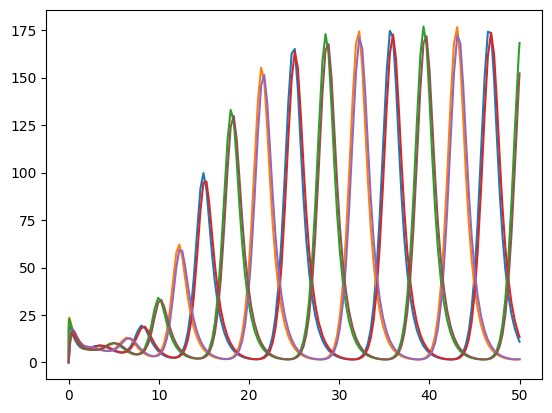

In [ ]:
import numpy as np
import math
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#discretise the equations
def gene_regulation(t,c):
    dy = np.zeros_like(c)

    a = 1000;
    n = 2.5;
    a0 = 1;
    b = 5;

    dy[0] = -c[0] + a/(1+(c[5]**n)) + a0
    dy[1] = -c[1] + a/(1+(c[3]**n)) + a0
    dy[2] = -c[2] + a/(1+(c[4]**n)) + a0
    dy[3] = -b * (c[3] - c[0])
    dy[4] = -b * (c[4] - c[1])
    dy[5] = -b * (c[5] - c[2])

    return dy

Init = [1,2,3,0,0,0]

t = np.linspace(0,50,1001)
#c = odeint(gene_regulation,Init,t,args=(),rtol = 10**(-12),h0=0.0001,hmax=0.001)
res = solve_ivp(gene_regulation,[0,50],Init);

fig, ax = plt.subplots();

ax.plot(res.t, res.y.T); #transport res.y for plotting

Below is some example code to demonstrate how to calculate the eigenvalues of a 6x6 matrix. You can edit this to calculate the eigenvalues of the Jacobian matrix (see https://biocircuits.github.io/technical_appendices/09b_linear_stability_analysis.html).

In [ ]:
from numpy import linalg as LA
A = np.array([[1,0,0,0,0,0],
             [0,1,0,0,0,0],
             [0,0,1,0,0,0],
             [0,0,0,1,0,0],
             [0,0,0,0,1,0],
             [0,0,0,0,0,1]]);

eigenvalues, eigenvectors = LA.eig(A);

print(eigenvalues)


[1. 1. 1. 1. 1. 1.]
